### Step 0:

If your computer don't install `torch` and `torchvision` yet, please run below or see [Start Locally | PyTorch](https://pytorch.org/get-started/locally/#start-locally)

In [0]:
!pip install torch torchvision

Also, `matplotlib`, `numpy`, `pandas` and `sklearn` will be used.  
If your computer don't install these, please run below.

In [0]:
!pip install matplotlib numpy pandas sklearn

### Step: 1

If you don't run command `python train_wgangp.py` yet, please run below.

In [0]:
!python train_wgangp.py --training_label 1

### Step: 2
If you don't run command `train_z_encoding_izif.py` yet, please run below after Step: 1.

In [0]:
!python train_encoder_izif.py --training_label 1

### Step: 3  
If you don't run command `test_anomaly_detection.py` yet, please run below after Step: 2.

In [0]:
!python test_anomaly_detection.py --training_label 1

# Visualization

Please run below after Step: 1~3.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("results/score.csv")
df

,label,img_distance,anomaly_score,z_distance
0,1,0.042026,0.076882,0.012172
1,1,0.012609,0.025994,0.009331
2,1,0.014172,0.046840,0.011862
3,1,0.021054,0.052469,0.036639
4,1,0.032047,0.067287,0.008199
...,...,...,...,...
64602,2,0.508130,1.898295,0.620139
64603,3,0.500483,1.075446,0.429588
64604,4,0.306296,1.012973,0.211564
64605,5,0.275821,0.817085,0.257127


In [0]:
trainig_label = 1
labels = np.where(df["label"].values == trainig_label, 0, 1)
anomaly_score = df["anomaly_score"].values
img_distance = df["img_distance"].values
z_distance = df["z_distance"].values

In [0]:
fpr, tpr, _ = roc_curve(labels, img_distance)
roc_auc = auc(fpr, tpr)

## Image-level anomaly detection accuracy evaluation

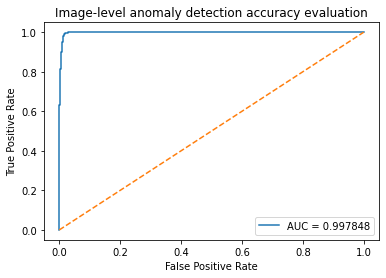

In [5]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("Image-level anomaly detection accuracy evaluation")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Discrete distributions of anomaly scores

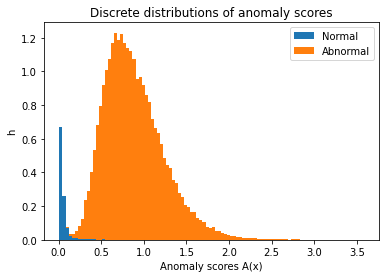

In [6]:
plt.hist([anomaly_score[labels == 0], anomaly_score[labels == 1]],
          bins=100, density=True, stacked=True,
          label=["Normal", "Abnormal"])
plt.title("Discrete distributions of anomaly scores")
plt.xlabel("Anomaly scores A(x)")
plt.ylabel("h")
plt.legend()
plt.show()